In [1]:
import pandas as pd
import numpy as np

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8b5f588b68da4996baf70e6bd300258a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mhysRV5fFaeZT8FFyCSyIRuXCcJUpRh7o3amN4oTD6qU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8b5f588b68da4996baf70e6bd300258a.get_object(Bucket='lifeexpectancyproject-donotdelete-pr-wxfatyomqfusyj',Key='Life Expectancy Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df_data_0.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cor = df_data_0.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

<Figure size 640x480 with 2 Axes>

In [5]:
cor_target = abs(cor["Life expectancy "])
print(cor_target)


Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                    0.696359
infant deaths                      0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                            0.157586
 BMI                               0.567694
under-five deaths                  0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                          0.556556
GDP                                0.461455
Population                         0.021538
 thinness  1-19 years              0.477183
 thinness 5-9 years                0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64


In [6]:
relevant_features = cor_target[cor_target<0.20]
relevant_features

Year             0.170033
infant deaths    0.196557
Measles          0.157586
Population       0.021538
Name: Life expectancy , dtype: float64

In [7]:
X = df_data_0.drop(['Year','infant deaths','Measles ','Population','Country'],axis=1)

In [8]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
print(min(df_data_0.Schooling))
print(max(df_data_0.Schooling))

0.0
20.7


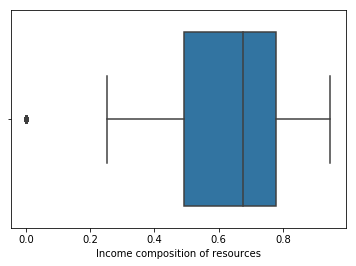

In [10]:
X['Schooling'].fillna((X['Schooling'].median()), inplace=True)
import seaborn as sns
sns.boxplot(x=df_data_0['Income composition of resources'])

In [11]:
print(min(X['Income composition of resources']))
print(max(X['Income composition of resources']))

0.0
0.948


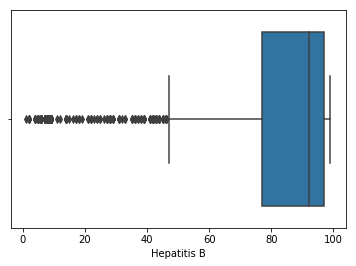

In [12]:
X['Income composition of resources'].fillna((X['Income composition of resources'].median()), inplace=True)
sns.boxplot(x=df_data_0['Hepatitis B'])

In [13]:
X['Hepatitis B'].fillna((X['Hepatitis B'].median()), inplace=True)
X['Adult Mortality'].fillna((X['Adult Mortality'].median()), inplace=True)
X[' thinness  1-19 years'].fillna((X[' thinness  1-19 years'].median()), inplace=True)
X[' thinness 5-9 years'].fillna((X[' thinness 5-9 years'].median()), inplace=True)
X['Polio'].fillna((X['Polio'].median()), inplace=True)
X['Diphtheria '].fillna((X['Diphtheria '].median()), inplace=True)

In [14]:
null_columns=X.columns[X.isnull().any()]
X[null_columns].isnull().sum()

Life expectancy       10
Alcohol              194
 BMI                  34
Total expenditure    226
GDP                  448
dtype: int64

In [15]:
X_final = X.dropna(axis=0)
X_final.shape

(2308, 17)

In [16]:
y = X_final['Life expectancy ']
X_final = X_final.drop('Life expectancy ',axis=1)

In [17]:
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
5       58.8
6       58.6
7       58.1
8       57.5
9       57.3
10      57.3
11      57.0
12      56.7
13      56.2
14      55.3
15      54.8
16      77.8
17      77.5
18      77.2
19      76.9
20      76.6
21      76.2
22      76.1
23      75.3
24      75.9
25      74.2
26      73.5
27      73.0
28      72.8
29      73.3
        ... 
2907    61.1
2908    63.0
2909    59.2
2910    58.2
2911    58.0
2912    57.4
2913    55.7
2914    52.6
2915    58.0
2916    49.3
2917    47.9
2918    46.4
2919    45.5
2920    44.6
2921    43.8
2923    59.2
2924    58.0
2925    56.6
2926    54.9
2927    52.4
2928    50.0
2929    48.2
2930    46.6
2931    45.4
2932    44.6
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 2308, dtype: float64


In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_final.Status = le.fit_transform(X_final.Status)
print(X_final.Status)

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
2907    1
2908    1
2909    1
2910    1
2911    1
2912    1
2913    1
2914    1
2915    1
2916    1
2917    1
2918    1
2919    1
2920    1
2921    1
2923    1
2924    1
2925    1
2926    1
2927    1
2928    1
2929    1
2930    1
2931    1
2932    1
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2308, dtype: int64


In [19]:
value2 = X_final.Status.value_counts()[0]
print(value2)
print(X_final)

420
      Status  Adult Mortality  Alcohol  percentage expenditure  Hepatitis B  \
0          1            263.0     0.01               71.279624         65.0   
1          1            271.0     0.01               73.523582         62.0   
2          1            268.0     0.01               73.219243         64.0   
3          1            272.0     0.01               78.184215         67.0   
4          1            275.0     0.01                7.097109         68.0   
5          1            279.0     0.01               79.679367         66.0   
6          1            281.0     0.01               56.762217         63.0   
7          1            287.0     0.03               25.873925         64.0   
8          1            295.0     0.02               10.910156         63.0   
9          1            295.0     0.03               17.171518         64.0   
10         1            291.0     0.02                1.388648         66.0   
11         1            293.0     0.02          

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.2, random_state = 1)

In [21]:
X_train.columns

Index(['Status', 'Adult Mortality', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [22]:
from sklearn import preprocessing
sc = preprocessing.MinMaxScaler()
X_train.loc[:][1:] = sc.fit_transform(X_train.loc[:][1:])
X_test.loc[:][1:] = sc.transform(X_test.loc[:][1:])


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [23]:
print(X_train)

      Status  Adult Mortality   Alcohol  percentage expenditure  Hepatitis B  \
2908       1       328.000000  2.410000               20.623063    79.000000   
407        1         0.397507  0.251400                0.005685     0.938144   
2531       0         0.090028  0.567749                0.530308     0.927835   
2204       1         0.191136  0.119821                0.029466     0.577320   
860        1         0.045706  0.059351                0.000267     0.969072   
1343       1         0.177285  0.029675                0.013668     0.958763   
520        1         0.684211  0.083427                0.003167     0.927835   
1918       0         0.091413  0.368981                0.782086     0.927835   
1562       1         0.360111  0.039194                0.002923     0.845361   
1997       1         0.213296  0.301232                0.001631     0.855670   
1389       1         0.295014  0.026316                0.000560     0.670103   
421        1         0.044321  0.232363 

# svm

In [24]:
from sklearn.svm import SVR
regressor1 = SVR(kernel = 'rbf')
regressor1.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_pred = regressor1.predict(X_test)

In [26]:
from sklearn.metrics import f1_score
#value = f1_score(y_test,y_pred,average='weighted')
regressor1.score(X_test,y_test)

0.6023187306315547

# Decision Tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
regressor2 = DecisionTreeRegressor(random_state = 0)
regressor2.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
regressor2.predict(X_test)

array([63. , 63. , 72.3, 82. , 67.7, 60. , 71. , 73.3, 65.9, 74.3, 72.6,
       68. , 47.6, 71. , 54. , 87. , 48.2, 56.1, 73.6, 77.3, 58.6, 81.1,
       64.9, 81.6, 73. , 86. , 74.9, 65.1, 81.8, 81. , 58.7, 78. , 84. ,
       74.4, 80. , 57.4, 72.3, 78.2, 77.2, 71.2, 62.7, 68.5, 53. , 57.4,
       82. , 69.5, 47.1, 72.4, 82.6, 76. , 77.8, 75. , 77.3, 71.4, 76.4,
       68.4, 82.3, 82. , 73. , 73.6, 47.1, 72.7, 73.9, 75.4, 62.1, 68.1,
       81.5, 79.1, 73.1, 82.2, 81.4, 62.5, 74.5, 79.3, 64.2, 45.9, 65.1,
       79.5, 64.3, 76. , 67. , 54.9, 71.8, 75. , 62. , 67.3, 72. , 59.1,
       49.8, 76. , 79.1, 75.8, 58. , 61.6, 75.4, 55.4, 84. , 71.5, 54.6,
       62.1, 64.6, 86. , 51.5, 67.6, 58. , 75.8, 82. , 74.3, 57.9, 72.8,
       78. , 63.8, 64.7, 71.8, 45.3, 57. , 63.8, 76.2, 77.3, 74.6, 84. ,
       73.4, 84. , 73. , 56.1, 76.6, 77.3, 58.5, 72.7, 41.5, 71.4, 74.5,
       65.1, 67.8, 76.7, 82.3, 67.4, 72.1, 58.9, 74. , 56.5, 72.3, 59.4,
       77.3, 77.8, 73.9, 63. , 82.6, 74.1, 72.3, 76

In [29]:
from sklearn.metrics import f1_score
#value = f1_score(y_test,y_pred,average='weighted')
regressor2.score(X_test,y_test)

0.8812582988895342

# Random forest

In [30]:
from sklearn.ensemble import RandomForestRegressor
regressor3 = RandomForestRegressor(n_estimators = 30, random_state = 0)
regressor3.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
regressor3.predict(X_test)

array([64.49      , 64.47333333, 72.22666667, 82.        , 67.81      ,
       53.15666667, 71.33666667, 72.13666667, 74.71      , 74.64333333,
       72.39      , 68.65      , 48.61333333, 74.00333333, 51.03      ,
       80.99      , 46.83333333, 56.73666667, 71.33      , 76.86666667,
       60.22333333, 82.00666667, 65.40666667, 82.89      , 73.92666667,
       83.11      , 74.58666667, 65.26333333, 82.09333333, 82.73333333,
       58.57      , 70.32666667, 82.50666667, 74.46666667, 80.99      ,
       55.01666667, 73.07666667, 78.19666667, 76.76333333, 72.33666667,
       62.36666667, 70.41      , 54.27666667, 56.9       , 82.62666667,
       68.93      , 48.27      , 72.55666667, 82.63      , 70.71666667,
       76.97666667, 71.67333333, 76.31      , 73.64333333, 78.24333333,
       70.04666667, 82.43      , 82.10666667, 74.1       , 72.37      ,
       47.76333333, 73.19      , 74.20333333, 72.60333333, 60.04      ,
       67.55333333, 82.09      , 80.57666667, 70.64666667, 81.96

In [32]:
from sklearn.metrics import f1_score
#value = f1_score(y_test,y_pred,average='weighted')
regressor3.score(X_test,y_test)

0.941394313410782

In [33]:
!pip install watson-machine-learning-client

In [34]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-12 08:21:54,302 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [35]:
wml_credentials={
  "apikey": "saikhAZir55RB9bAjdFPF_YxhyhzEJM1Fh5xwkBgWdNN",
  "instance_id": "167a1e0a-e17e-4174-b51a-6421b2ec6bc1",
  "url": "https://us-south.ml.cloud.ibm.com"
}


In [36]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [37]:
model_props = {client.repository.ModelMetaNames.AUTHOR_NAME: "Likitha T", 
               client.repository.ModelMetaNames.AUTHOR_EMAIL: "17131a12a7@gvpce.ac.in", 
               client.repository.ModelMetaNames.NAME: "Life Expectancy"}

In [38]:
model_artifact =client.repository.store_model(regressor3, meta_props=model_props)

In [39]:
published_model_uid = client.repository.get_model_uid(model_artifact)
published_model_uid

'd1d6b254-cd80-432e-bf62-c277ce04cbd1'

In [40]:
deployment = client.deployments.create(published_model_uid, name="Life Expectancy")



#######################################################################################

Synchronous deployment creation for uid: 'd1d6b254-cd80-432e-bf62-c277ce04cbd1' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='8cc8df78-aa0f-463e-8125-966074c25f35'
------------------------------------------------------------------------------------------------




In [41]:
scoring_endpoint = client.deployments.get_scoring_url(deployment)
scoring_endpoint

'https://us-south.ml.cloud.ibm.com/v3/wml_instances/167a1e0a-e17e-4174-b51a-6421b2ec6bc1/deployments/8cc8df78-aa0f-463e-8125-966074c25f35/online'

In [42]:
regressor3.predict([[1,271,0.01,73.52,62,18.6,86,58,8.81,61,0.2,612.5,17.5,17.5,0.476,10]])

array([57.75])